# Flight-Fare Prediction

### FEATURES: 

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## Models used :

   ###     KNN  :  57.11%                    accuracy
   ###     Random Forest : 88.83%   accuracy

# 

In [1]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r"Data_Train.xlsx")
test = pd.read_excel(r"Test_set.xlsx")

## Explore dataset

In [3]:
data.shape

(10683, 11)

In [4]:
test.shape

(2671, 10)

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
data.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_o

In [8]:
print(data.isnull().sum()) 
print(test.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [9]:
data.dropna(inplace = True)

In [10]:
data.drop_duplicates()
data.shape

(10682, 11)

In [11]:
test.drop_duplicates()
test.shape

(2671, 10)

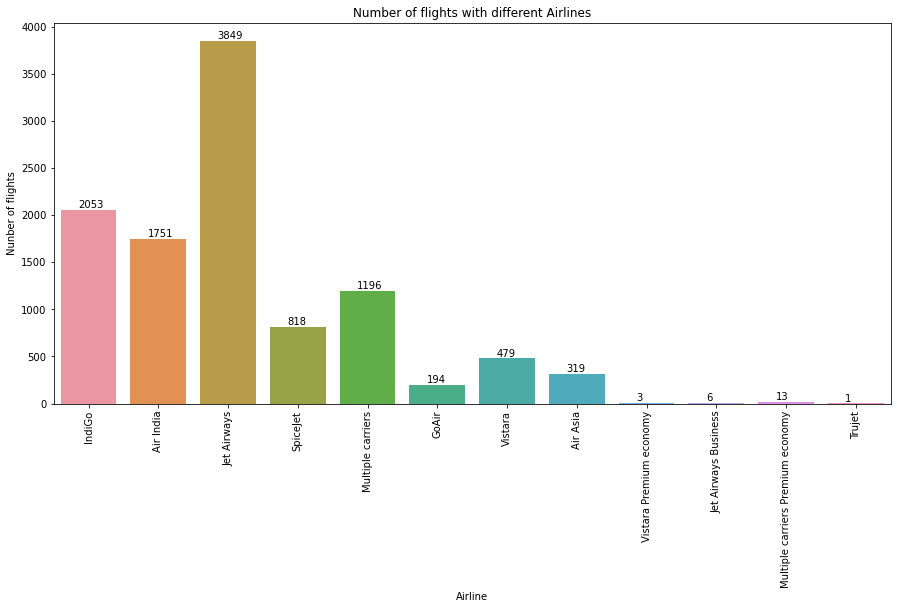

In [12]:
plt.figure(figsize = (15,7))
plt.title('Number of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data)
plt.xlabel('Airline')
plt.ylabel('Nunber of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

### There are more number of flights of Jet Airways.

### Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.

# 

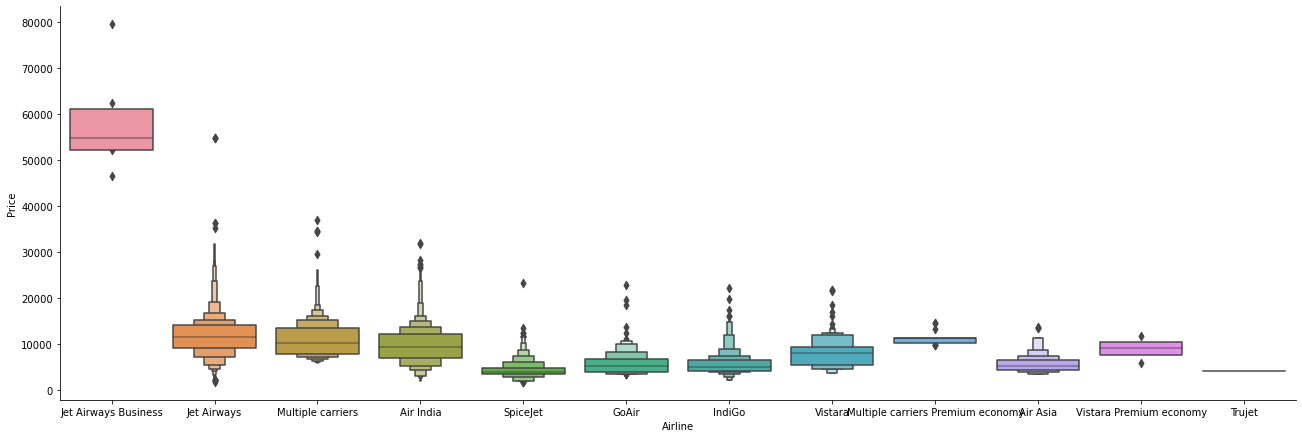

In [13]:
# Airline vs Price


sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False),kind="boxen", height =6, aspect = 3)

plt.show()

### From graph we can see that Jet Airways Business have the highest Price.
### Apart from the first Airline almost all are having similar median

# 

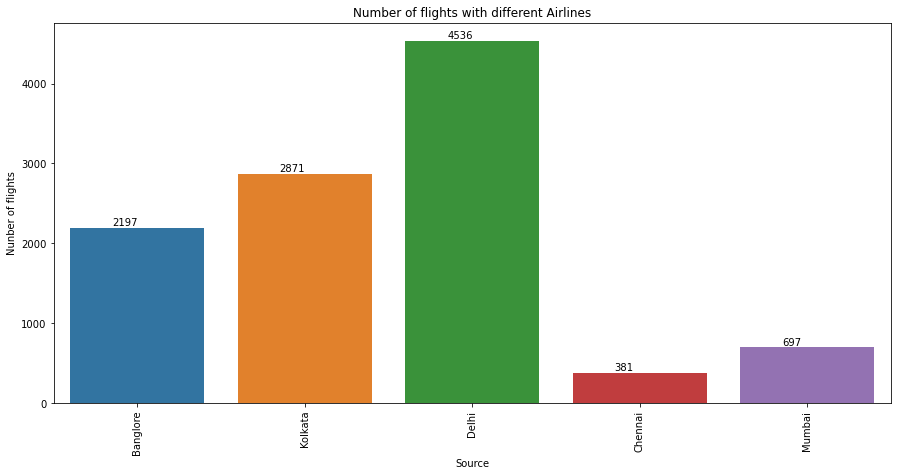

In [14]:
plt.figure(figsize = (15, 7))
plt.title('Number of flights with different Airlines')
ax=sns.countplot(x = 'Source', data =data)
plt.xlabel('Source')
plt.ylabel('Nunber of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

# 

## FEATURE EXTRACTION

In [15]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Extracting day,month,weekday from Date of Journey#### 

In [16]:
data['Journey_Day'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.day
data['Journey_Month'] = pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.month
data['weekday']= pd.to_datetime(data.Date_of_Journey, format='%d/%m/%Y').dt.weekday

test['Journey_Day'] = pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.day
test['Journey_Month'] = pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.month
test['weekday']= pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [17]:
# Since we have converted Date_of_Journey column into integers,we can drop Date_of_Journey .

data.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
test.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [18]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2


### Converting Departure and Arraival time in to minutes

In [19]:
data["Dep_in min"] = (pd.to_datetime(data["Dep_Time"]).dt.hour)*60 + pd.to_datetime(data["Dep_Time"]).dt.minute
test["Dep_in min"] = (pd.to_datetime(test["Dep_Time"]).dt.hour)*60 + pd.to_datetime(test["Dep_Time"]).dt.minute

In [20]:
data["Arr_in min"] = (pd.to_datetime(data["Arrival_Time"]).dt.hour)*60 + pd.to_datetime(data["Arrival_Time"]).dt.minute
test["Arr_in min"] = (pd.to_datetime(test["Arrival_Time"]).dt.hour)*60 + pd.to_datetime(test["Arrival_Time"]).dt.minute

In [21]:
data.drop(["Dep_Time"], axis = 1, inplace = True)
data.drop(["Arrival_Time"], axis = 1, inplace = True)

test.drop(["Dep_Time"], axis = 1, inplace = True)
test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [22]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Dep_in min,Arr_in min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,6,1340,70
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2,350,795
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,6,565,265
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,6,1085,1410
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,4,1010,1295


### Converting duration into minutes

In [23]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
data['Duration']=data['Duration'].apply(duration)
test['Duration']=test['Duration'].apply(duration)

In [24]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Dep_in min,Arr_in min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,6,1340,70
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,2,350,795
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,6,565,265
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,6,1085,1410
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,4,1010,1295


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_Day      10682 non-null  int64 
 9   Journey_Month    10682 non-null  int64 
 10  weekday          10682 non-null  int64 
 11  Dep_in min       10682 non-null  int64 
 12  Arr_in min       10682 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.4+ MB


### Converting Total_stops to 0,1,2,3 and so on..

In [26]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [27]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [28]:
#we don't need Route as we already have total_stops

data.drop(["Route"], axis = 1, inplace = True)
test.drop(["Route"], axis = 1, inplace = True)

In [29]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Dep_in min,Arr_in min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,24,3,6,1340,70
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,2,350,795
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882,9,6,6,565,265
3,IndiGo,Kolkata,Banglore,325,1,No info,6218,12,5,6,1085,1410
4,IndiGo,Banglore,New Delhi,285,1,No info,13302,1,3,4,1010,1295


In [30]:
# Import label encoder 

from sklearn import preprocessing 

le = preprocessing.LabelEncoder()

col = list(data.columns)  
for a in col:
    if data[a].dtype==object:
        data[a]= le.fit_transform(data[a])

In [31]:

col = list(test.columns)  
for a in col:
    if test[a].dtype==object:
        test[a]= le.fit_transform(test[a])

In [32]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Dep_in min,Arr_in min
0,3,0,5,141,0,8,3897,24,3,6,1340,70
1,1,3,0,251,2,8,7662,1,5,2,350,795
2,4,2,1,26,2,8,13882,9,6,6,565,265
3,3,3,0,227,1,8,6218,12,5,6,1085,1410
4,3,0,5,218,1,8,13302,1,3,4,1010,1295


In [33]:
test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday,Dep_in min,Arr_in min
0,4,2,1,247,1,5,6,6,3,1050,265
1,3,3,0,164,1,5,12,5,6,380,620
2,4,2,1,68,1,3,21,5,1,1155,1140
3,6,2,1,273,1,5,21,5,1,480,1260
4,0,0,2,124,0,5,24,6,0,1435,165


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10682 non-null  int32
 1   Source           10682 non-null  int32
 2   Destination      10682 non-null  int32
 3   Duration         10682 non-null  int32
 4   Total_Stops      10682 non-null  int64
 5   Additional_Info  10682 non-null  int32
 6   Price            10682 non-null  int64
 7   Journey_Day      10682 non-null  int64
 8   Journey_Month    10682 non-null  int64
 9   weekday          10682 non-null  int64
 10  Dep_in min       10682 non-null  int64
 11  Arr_in min       10682 non-null  int64
dtypes: int32(5), int64(7)
memory usage: 1.1 MB


In [35]:
data["Airline"]=data["Airline"].astype(object)
data["Source"]=data["Source"].astype(object)
data["Destination"]=data["Destination"].astype(object)
data["Total_Stops"]=data["Total_Stops"].astype(object)
data["Additional_Info"]=data["Additional_Info"].astype(object)
data["Journey_Day"]=data["Journey_Day"].astype(object)
data["Journey_Month"]=data["Journey_Month"].astype(object)
data["weekday"] = data["weekday"].astype(object)

In [36]:
test["Airline"]=test["Airline"].astype(object)
test["Source"]=test["Source"].astype(object)
test["Destination"]=test["Destination"].astype(object)
test["Total_Stops"]=test["Total_Stops"].astype(object)
test["Additional_Info"]=test["Additional_Info"].astype(object)
test["Journey_Day"]=test["Journey_Day"].astype(object)
test["Journey_Month"]=test["Journey_Month"].astype(object)
test["weekday"] = test["weekday"].astype(object)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Duration         10682 non-null  int32 
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_Day      10682 non-null  object
 8   Journey_Month    10682 non-null  object
 9   weekday          10682 non-null  object
 10  Dep_in min       10682 non-null  int64 
 11  Arr_in min       10682 non-null  int64 
dtypes: int32(1), int64(3), object(8)
memory usage: 1.3+ MB


In [38]:
data.head() 

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Dep_in min,Arr_in min
0,3,0,5,141,0,8,3897,24,3,6,1340,70
1,1,3,0,251,2,8,7662,1,5,2,350,795
2,4,2,1,26,2,8,13882,9,6,6,565,265
3,3,3,0,227,1,8,6218,12,5,6,1085,1410
4,3,0,5,218,1,8,13302,1,3,4,1010,1295


# 

In [39]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [40]:
X=data.drop(["Price"],axis=1)
Y=data["Price"]

In [41]:
x=np.array(X)
y=np.array(Y)

### KNN

In [42]:
number_of_neighbors = range(1,20)
params = {'n_neighbors':number_of_neighbors}
knn = KNeighborsRegressor()
knn_model = GridSearchCV(knn, params, cv=5) 
knn_model.fit(x,y)
scores = cross_val_score(knn_model, x, y, cv=5)
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

Cross validation score: 57.11% (+/- 6.54%)


### Random Forest

In [43]:

parameters = {'n_estimators':[50], "max_features" : ["auto", "log2", "sqrt"],"bootstrap": [True, False]}
rf_reg = RandomForestRegressor()
rf_model = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=-1)
rf_model.fit(x, y)
scores = cross_val_score(rf_model, x, y, cv=5)
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

Cross validation score: 88.83% (+/- 1.47%)


# Accuracy is   88.83 %   with  error of 1.47%

# 

## Predicting the flight price for test data

In [44]:
x_test=np.array(test)
pred_price=rf_model.predict(x_test)

In [45]:
test_data= pd.read_excel('Test_set.xlsx')
test_data["pred_price"]=pred_price

In [46]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,pred_price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,10323.64
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,4709.00
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,32653.38
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,9268.20
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,3723.68


## Last column of the above table is the prediceted flight price of the test data